In [67]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_excel('sales_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


##سوال شماره 1

In [70]:
# دسته بندی محصولات خریداری شده بر اساس شماره درخواست و کد محصول

order_number_products = df.groupby(['ORDERNUMBER'])['PRODUCTCODE'].apply(','.join).reset_index()
order_number_products.head()

,ORDERNUMBER,PRODUCTCODE
0,10100,"S18_1749,S18_2248,S18_4409,S24_3969"
1,10101,"S18_2325,S18_2795,S24_1937,S24_2022"
2,10102,"S18_1342,S18_1367"
3,10103,"S10_1949,S10_4962,S12_1666,S18_1097,S18_2432,S..."
4,10104,"S12_3148,S12_4473,S18_2238,S18_2319,S18_3232,S..."


In [71]:
# تعریف تابع برای ایجاد گراف کامل بین محصولاتی که با هم خریداری شده اند
# اگر در مراحل قبل بین دو محصول ارتباط برقرار شده بود صرفا وزن یال افزایش داده می شود
def fully_connect(nodes):
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            n1 = nodes[i]
            n2 = nodes[j]
            if G.has_edge(n1, n2):
                weight = G.get_edge_data(n1, n2)['weight']
                G.add_edge(n1, n2, weight=weight + 1)
            else:
                G.add_edge(n1, n2, weight=1)

# تعریف گراف بدون جهت
G = nx.Graph()

# ایجاد گراف ارتباط محصولات
for _, row in order_number_products.iterrows():
    products = row['PRODUCTCODE'].split(',')
    fully_connect(products)

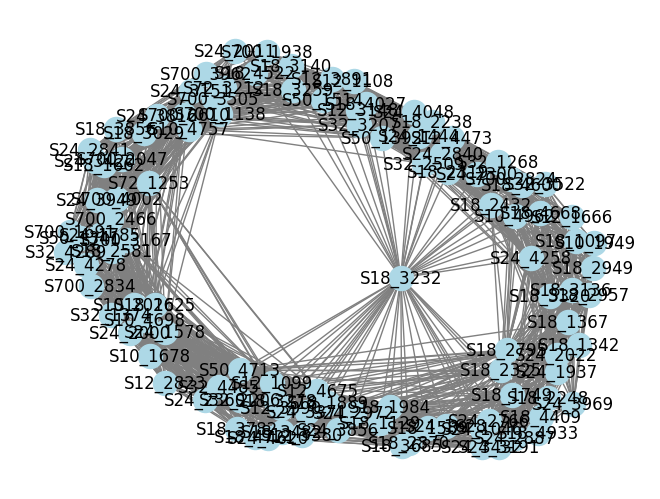

In [72]:
# نمایش گراف محصولاتی که با هم خریداری شده اند
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

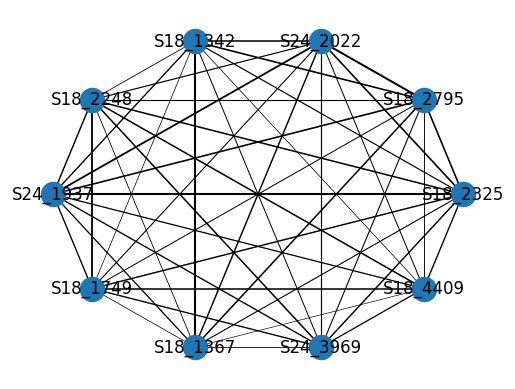

In [73]:
# نمایش بخشی از گراف

nodes_to_include = list(G.nodes)[None:10:None]
subgraph = G.subgraph(nodes_to_include)

weights = [subgraph[u][v]['weight'] for u, v in subgraph.edges()]
max_weight = max(weights)
scaling_factor = 1.5 / max_weight

pos = nx.circular_layout(subgraph)
nx.draw_networkx_nodes(subgraph, pos)
nx.draw_networkx_edges(subgraph, pos, width=[w * scaling_factor for w in weights])
nx.draw_networkx_labels(subgraph, pos)

plt.axis('off')
plt.show()

In [74]:
# ایجاد ماتریس متناظر با گراف

adj_matrix = nx.to_numpy_array(G)
products_matrix = pd.DataFrame(adj_matrix, index=G.nodes(), columns=G.nodes())
products_matrix.to_csv('graph_adjacency_matrix.csv', index=True, header=True)
products_matrix.head()

,S18_1749,S18_2248,S18_4409,S24_3969,S18_2325,S18_2795,S24_1937,S24_2022,S18_1342,S18_1367,...,S18_3685,S24_2972,S18_1589,S18_4933,S24_1046,S24_1628,S24_2766,S24_2887,S24_3191,S24_3432
S18_1749,0.0,20.0,17.0,15.0,16.0,11.0,15.0,12.0,8.0,8.0,...,4.0,2.0,7.0,14.0,10.0,8.0,10.0,11.0,10.0,8.0
S18_2248,20.0,0.0,17.0,17.0,17.0,12.0,16.0,13.0,9.0,9.0,...,3.0,1.0,6.0,14.0,11.0,9.0,10.0,11.0,10.0,9.0
S18_4409,17.0,17.0,0.0,14.0,15.0,10.0,14.0,11.0,8.0,7.0,...,4.0,1.0,8.0,19.0,14.0,10.0,14.0,16.0,14.0,12.0
S24_3969,15.0,17.0,14.0,0.0,16.0,12.0,15.0,13.0,11.0,9.0,...,1.0,0.0,3.0,11.0,8.0,5.0,11.0,12.0,11.0,10.0
S18_2325,16.0,17.0,15.0,16.0,0.0,18.0,23.0,18.0,13.0,12.0,...,2.0,2.0,4.0,13.0,10.0,6.0,9.0,10.0,9.0,8.0


In [75]:
# تعریف تابع پیشنهاد دهنده برای خرید محصولاتی جانبی
def buy_recommendation(product_name):
    sorted_row = products_matrix.loc[product_name].sort_values(ascending=False)
    print(sorted_row.head(10))

# مثال
buy_recommendation('S18_4409')

S18_4933    19.0
S18_1749    17.0
S18_2248    17.0
S24_2887    16.0
S18_2325    15.0
S24_3191    14.0
S24_3969    14.0
S24_1937    14.0
S24_2766    14.0
S24_1046    14.0
Name: S18_4409, dtype: float64


##سوال شماره 4

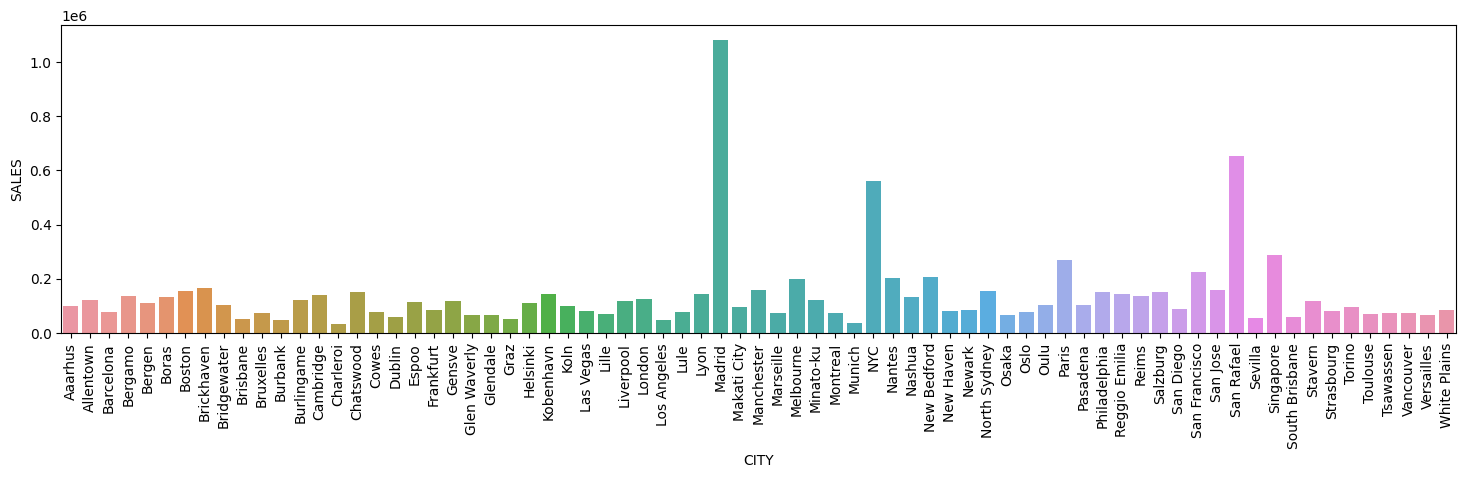

In [ ]:
# دسته بندی شهرها بر اساس مقدار فروش
city_sales = df.groupby(['CITY'])['SALES'].sum().reset_index()

plt.figure(figsize=(18, 4))
sns.barplot(x=city_sales['CITY'], y=city_sales['SALES'])
plt.xticks(rotation='vertical')
plt.show()

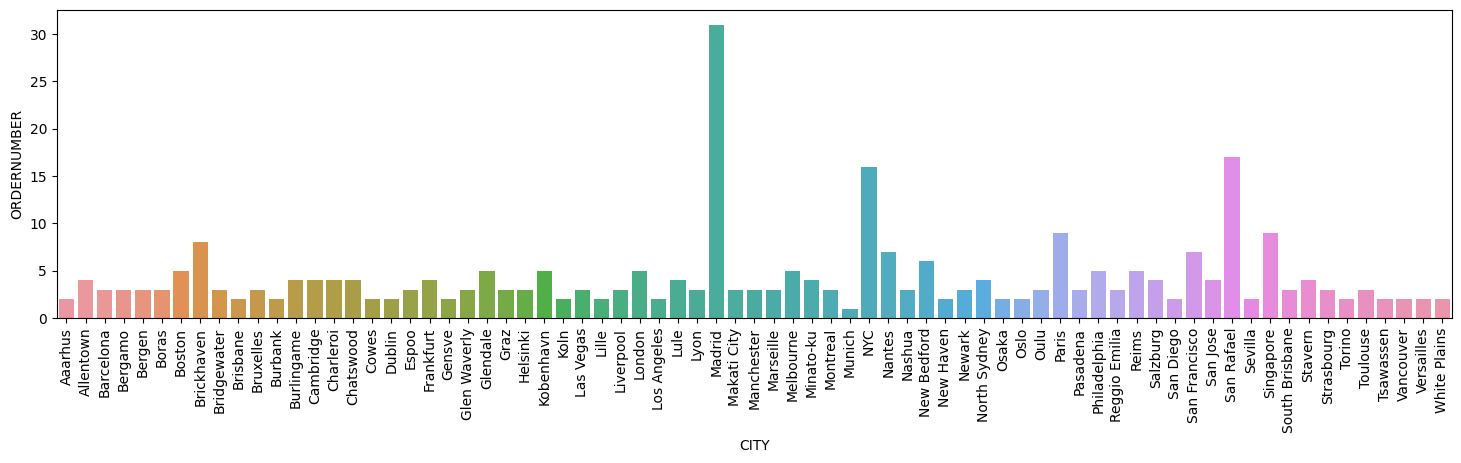

In [ ]:
# دسته بندی شهرها بر اساس تعداد سفارش
city_sales = df.groupby(['CITY'])['ORDERNUMBER'].nunique().reset_index()

plt.figure(figsize=(18, 4))
sns.barplot(x=city_sales['CITY'], y=city_sales['ORDERNUMBER'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# مرتب کردن شهرها بر اساس بیشترین تعداد سفارش و بیشترین فروش

city_sales = df.groupby('CITY').agg({'SALES': 'sum', 'ORDERNUMBER': 'nunique'})
city_sales = city_sales.sort_values(['ORDERNUMBER', 'SALES'], ascending=[False, False])

# پنج شهر اول با ویژگی های ذکر شده
city_sales.head(5)

,SALES,ORDERNUMBER
CITY,,
Madrid,1082551.44,31
San Rafael,654858.06,17
NYC,560787.77,16
Singapore,288488.41,9
Paris,268944.68,9


##سوال شماره 5

In [ ]:
# تفکیک نواحی بر اساس کشور
df['COUNTRY-TERRITORY'] = df['COUNTRY'] + '-' + df['TERRITORY']

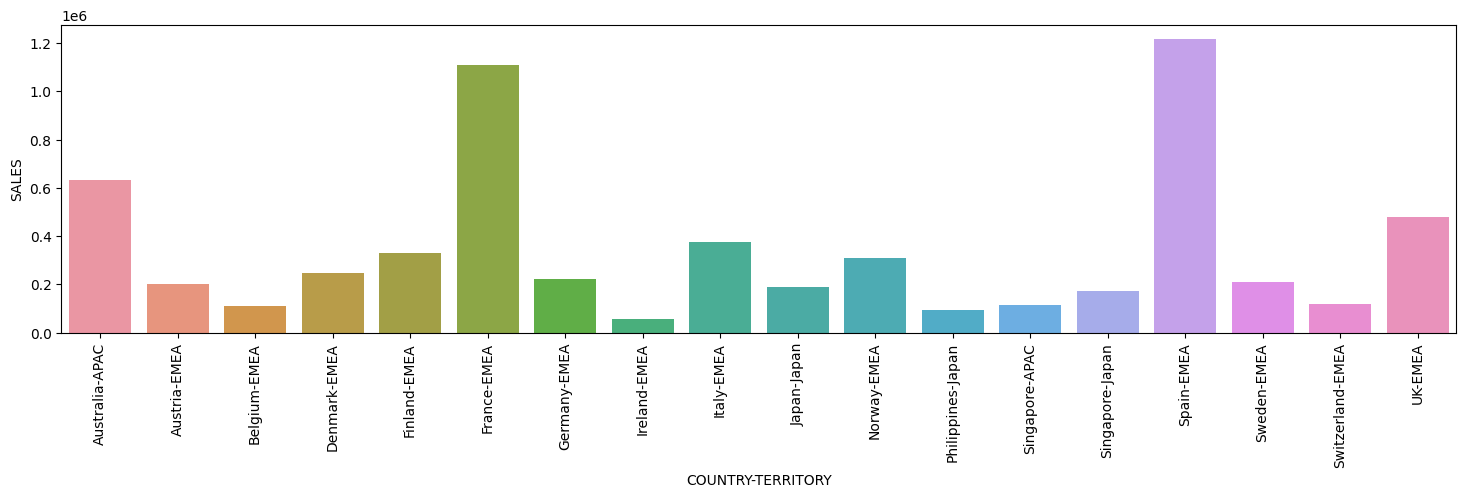

In [ ]:
# دسته بندی ناحیه ها بر اساس مقدار فروش
territory_sales = df.groupby(['COUNTRY-TERRITORY'])['SALES'].sum().reset_index()

plt.figure(figsize=(18, 4))
sns.barplot(x=territory_sales['COUNTRY-TERRITORY'], y=territory_sales['SALES'])
plt.xticks(rotation='vertical')
plt.show()

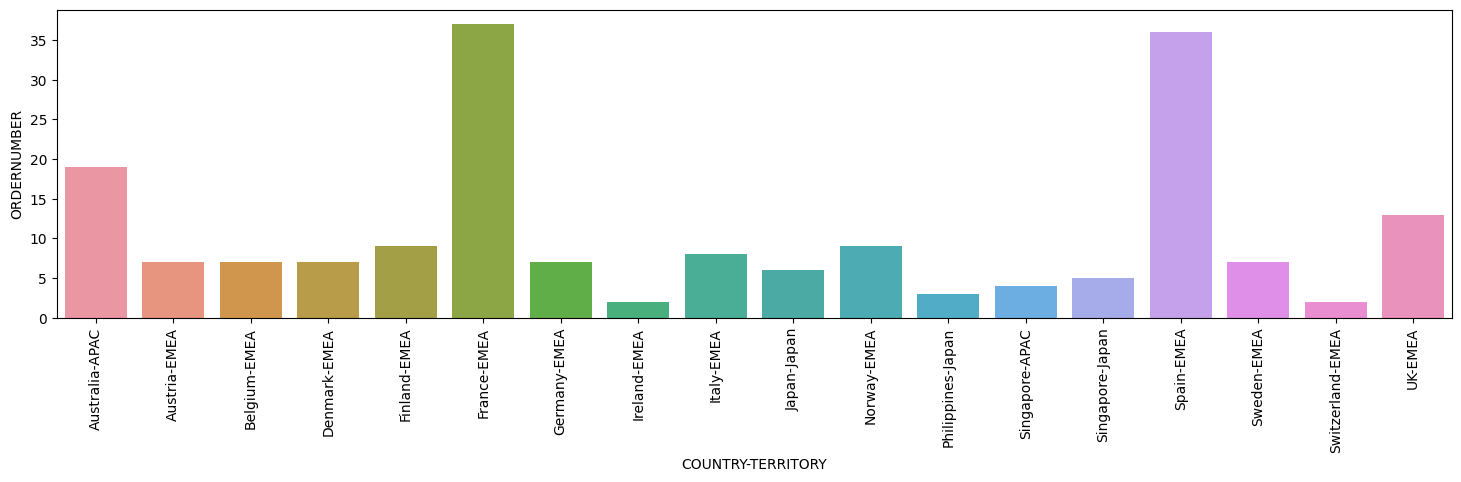

In [ ]:
# دسته بندی ناحیه ها بر اساس تعداد سفارش
territory_sales = df.groupby(['COUNTRY-TERRITORY'])['ORDERNUMBER'].nunique().reset_index()

plt.figure(figsize=(18, 4))
sns.barplot(x=territory_sales['COUNTRY-TERRITORY'], y=territory_sales['ORDERNUMBER'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# مرتب کردن ناحیه ها بر اساس کمترین تعداد سفارش و بیشترین فروش

territory_sales = df.groupby('COUNTRY-TERRITORY').agg({'SALES': 'sum', 'ORDERNUMBER': 'nunique'})
territory_sales = territory_sales.sort_values(['ORDERNUMBER', 'SALES'], ascending=[True, False])

# پنج ناحیه اول با ویژگی های ذکر شده
territory_sales.head(5)

,SALES,ORDERNUMBER
COUNTRY-TERRITORY,,
Switzerland-EMEA,117713.56,2
Ireland-EMEA,57756.43,2
Philippines-Japan,94015.73,3
Singapore-APAC,115498.73,4
Singapore-Japan,172989.68,5


##سوال شماره 6

In [81]:
motorcycles = df[df['PRODUCTLINE'] == 'Motorcycles']

city_motorcycles = pd.DataFrame(columns=['source', 'target', 'weight'])

data = []
for _, row in motorcycles.iterrows():
    city = row['CITY']
    motorcycle = row['PRODUCTCODE']
    data.append([city, motorcycle, 1])

city_motorcycles = pd.DataFrame(data, columns=['source', 'target', 'weight'])
city_motorcycles = city_motorcycles.groupby(['source', 'target']).sum().reset_index()
city_motorcycles = city_motorcycles.sort_values(['weight'], ascending=[False])

city_motorcycles.to_csv('city_motorcycles.csv', index=False)

city_motorcycles.head(10)

,source,target,weight
134,NYC,S12_2823,4
190,Paris,S50_4713,3
109,Madrid,S32_2206,3
184,Paris,S18_3782,3
131,NYC,S10_1678,3
137,NYC,S24_1578,3
133,NYC,S10_4698,3
107,Madrid,S24_2360,2
105,Madrid,S18_3782,2
90,Lille,S50_4713,2


In [77]:
# ایجاد گراف بین شهرها و موتورسیکلت ها
G = nx.Graph()

for _, row in city_motorcycles.iterrows():
    source = row['source']
    target = row['target']
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

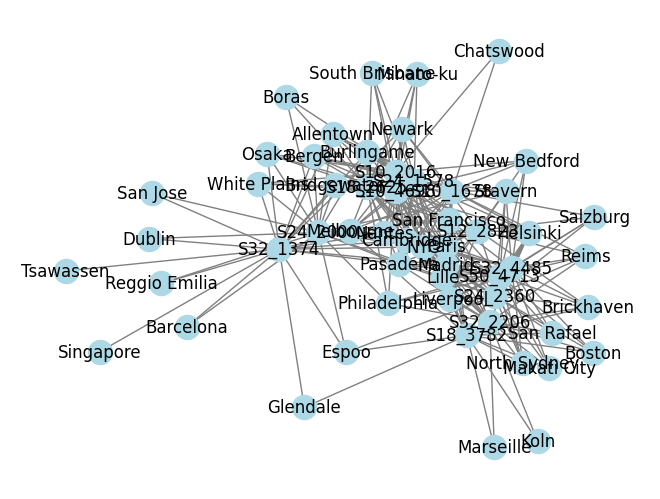

In [78]:
# نمایش گراف
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

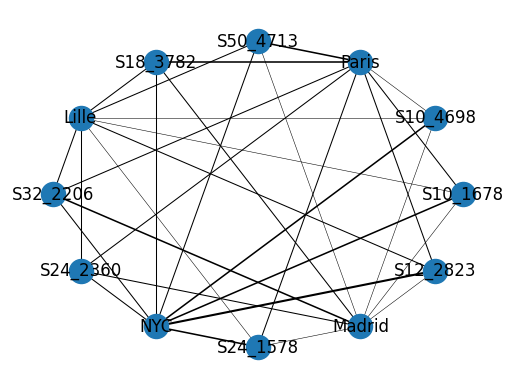

In [79]:
# نمایش بخشی از گراف

temp = city_motorcycles.head(10)
nodes_to_include = list(temp['source']) + list(temp['target'])
subgraph = G.subgraph(nodes_to_include)

weights = [subgraph[u][v]['weight'] for u, v in subgraph.edges()]
max_weight = max(weights)
scaling_factor = 1.5 / max_weight

pos = nx.circular_layout(subgraph)
nx.draw_networkx_nodes(subgraph, pos)
nx.draw_networkx_edges(subgraph, pos, width=[w * scaling_factor for w in weights])
nx.draw_networkx_labels(subgraph, pos)

plt.axis('off')
plt.show()